x1:  0  x2:  0  d:  0  y:  0
x1:  0  x2:  1  d:  1  y:  1
x1:  1  x2:  0  d:  1  y:  0
x1:  1  x2:  1  d:  0  y:  1
********************* 1 ***********************
x1:  0  x2:  0  d:  0  y:  0
x1:  0  x2:  1  d:  1  y:  0
x1:  1  x2:  0  d:  1  y:  0
x1:  1  x2:  1  d:  0  y:  1
********************* 2 ***********************
x1:  0  x2:  0  d:  0  y:  0
x1:  0  x2:  1  d:  1  y:  1
x1:  1  x2:  0  d:  1  y:  0
x1:  1  x2:  1  d:  0  y:  1
********************* 3 ***********************
x1:  0  x2:  0  d:  0  y:  0
x1:  0  x2:  1  d:  1  y:  0
x1:  1  x2:  0  d:  1  y:  0
x1:  1  x2:  1  d:  0  y:  1
********************* 4 ***********************
x1:  0  x2:  0  d:  0  y:  0
x1:  0  x2:  1  d:  1  y:  1
x1:  1  x2:  0  d:  1  y:  0
x1:  1  x2:  1  d:  0  y:  1
********************* 5 ***********************
x1:  0  x2:  0  d:  0  y:  0
x1:  0  x2:  1  d:  1  y:  0
x1:  1  x2:  0  d:  1  y:  0
x1:  1  x2:  1  d:  0  y:  1
********************* 6 ***********************
x1:  0  x2:  0  

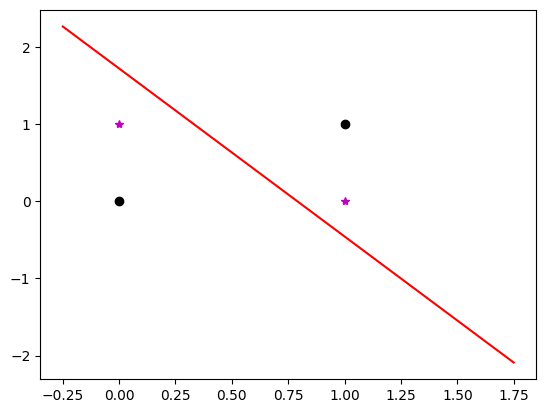

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([0,1,1,0])
w = np.random.random(3)

mi = 0.1
for r in range(100):
  for i in range( len(x) ):
    xx = x[i]
    dd = d[i]

    s = xx[0]*w[1] +xx[1]*w[2]+ w[0]*(-1)
    if s >= 0:
      y = 1
    else:
      y = 0

    w[0] = w[0] + mi*(dd-y)*(-1)
    w[1] = w[1] + mi*(dd-y)*(xx[0])
    w[2] = w[2] + mi*(dd-y)*(xx[1])

    print("x1: ",xx[0]," x2: ",xx[1]," d: ",dd," y: ",y)
  print(f'********************* {r+1} ***********************')

xx = np.arange(-0.25,2)
yy = -(w[1]/w[2]) * xx  + (w[0]/w[2])
plt.plot(xx, yy, 'r-')

for i in range(len(x)):
  if d[i] == 0:
    plt.plot(x[i,0], x[i,1], 'ko')
  else:
    plt.plot(x[i,0], x[i,1], 'm*')

Zadanie 1

In [ ]:
L=2 # liczba warstw
mi=0.1 # współczynnik uczenia u
N=[2,2,1] # N_0, N_1, N_2 - liczba neuronów (lub wejść dla N0) w każdej z warstw

w = [                        # wartosci wag
     [],                     # warstwa 0 (brak neuronow)
     [[],[0,0,0],[0,0,0]],   # warstwa 1 (nie ma neuronu 0, neuron 1 i 2 ma 3 wagi)
     [[],[0,0,0]]            # warstwa 2 (nie ma neuronu 0, neuron 1 ma 3 wagi)
    ]

s = [                        # wartości sum s
     [],                     # warstwa 0 nie posiada sum
     [None,0,0],             # warstwa 1 posiada sume dla neuronu 1 i 2 (nie ma neuronu 0 jest dlatego None)
     [None,0]                # warstwa 2 posiada sume dla neuronu 1 (nie ma neuronu 0 jest dlatego None)
    ]

x = [                        # wartości wejśc x
     [],                     # warstwa 0 nie posiada wejsc
     [-1,0,0],               # warstwa 1 posiada 3 wejscia dla keżdego neronu (x0+=1 oraz x1, x2)
     [-1,0,0]                # warstwa 2 posiada 3 wejscia dla neronu nr 1 (x0+=1 oraz x1, x2)
    ]

y = [                        # wartosci wyjsciowe nerownów (po wykonaniu funkcji aktywacji f(s))
     [],                     # warstwa 0 nie posiada wejsc
     [None,0,0],             # warstwa 1 posiada 2 wyjścia dla dwóch neuronów 1 i 2 (nie ma neronu 0 więc jest None)
     [None,0]                # warstwa 1 posiada 1 wyjście dla dwóch neronu 1 (nie ma neronu 0 więc jest None)
    ]

e = [                        # bład sygnału wyjsciowego
     [],
     [None,0,0],             # opis analogicznie do y
     [None,0]
    ]

dlt = [                      # wartosc korekty błędu
       [],
       [None,0,0],           # opis analogicznie do y
       [None,0]
      ]

import random
import math

def losuj_w():
  for k in range(1,L+1):                  # for k=1,(1),L iteracja od 1 do liczby warstw
    for i in range(1,N[k]+1):             # for i=1,(1),N_k, iteracja od 1 do liczby neuronów w każdej warstwie k
      for j in range(0,N[k-1]+1):         # for j=0,(1),N_k-1, iteracja po liczbie wejsc pochodzących z poprzedniej warstwy k-1
        w[k][i][j] = random.random()*2-1  # losowana jest waga z zakresu -1 do 1 j-tego wejścia, i-tego neuronu, k-tej warstwy

# funkcja aktywacji "sigmoida"
def f(s):
  return 1/(1+math.exp(-s))

# pochodna funkcja aktywacji
def f_poch(s):
  return f(s)*(1-f(s))

# obliczanie wartości wyjsciowych w kolejnych warstwach sieci (licz_y)
def licz_y(u):
  for k in range(1,L+1):
    for i in range(1,N[k-1]+1):
      if k==1:
        x[k][i]=u[i-1]
      else:
        x[k][i]=y[k-1][i]
    for i in range(1,N[k]+1):
      s[k][i]=0
      for j in range(0,N[k-1]+1):
        s[k][i] += w[k][i][j]*x[k][j]
      y[k][i]=f(s[k][i])
  return y[L][1]

# obliczanie wartości błedów w częściach nieliniowych neuronów kolejnych warstw sieci (licz_e)
def licz_e(d):
  for k in range(L,1-1,-1):
    for i in range(1,N[k]+1):
      if k==L:
        e[k][i]=d-y[k][i]
      else:
        e[k][i]=0
        for j in range(1,N[k+1]+1):
          e[k][i]+=dlt[k+1][j]*w[k+1][j][i]
      dlt[k][i] = e[k][i]*f_poch(s[k][i])
#*********************************************
#dane wejsciowe [u1,u2]
u =[ [0,0], [0,1], [1,0], [1,1] ]

#wzorcowe dane oczekiwane na wyjsciu sieci
d = [0,1,1,0]

# wylosowanie wag
losuj_w()

for m in range(100000):
  for n in range(len(u)):
    uu = u[n]
    dd = d[n]
    licz_y(uu)
    licz_e(dd)

    for k in range(1,L+1):
      for i in range(1,N[k]+1):
        for j in range(0,N[k-1]+1):
          w[k][i][j] =  w[k][i][j] + 2 * mi * dlt[k][i] * x[k][j]

for i in range (len(u)):
    uu = u[i]
    dd = d[i]
    print("d -> ",dd, "->",round(licz_y(uu)))

d ->  0 -> 0
d ->  1 -> 1
d ->  1 -> 1
d ->  0 -> 0


Zadanie 2

In [ ]:
L=2 # liczba warstw
mi=0.1 # współczynnik uczenia u
N=[2,2,1] # N_0, N_1, N_2 - liczba neuronów (lub wejść dla N0) w każdej z warstw

w = [                        # wartosci wag
     [],                     # warstwa 0 (brak neuronow)
     [[],[0,0,0],[0,0,0]],   # warstwa 1 (nie ma neuronu 0, neuron 1 i 2 ma 3 wagi)
     [[],[0,0,0]]            # warstwa 2 (nie ma neuronu 0, neuron 1 ma 3 wagi)
    ]

s = [                        # wartości sum s
     [],                     # warstwa 0 nie posiada sum
     [None,0,0],             # warstwa 1 posiada sume dla neuronu 1 i 2 (nie ma neuronu 0 jest dlatego None)
     [None,0]                # warstwa 2 posiada sume dla neuronu 1 (nie ma neuronu 0 jest dlatego None)
    ]

x = [                        # wartości wejśc x
     [],                     # warstwa 0 nie posiada wejsc
     [-1,0,0],               # warstwa 1 posiada 3 wejscia dla keżdego neronu (x0+=1 oraz x1, x2)
     [-1,0,0]                # warstwa 2 posiada 3 wejscia dla neronu nr 1 (x0+=1 oraz x1, x2)
    ]

y = [                        # wartosci wyjsciowe nerownów (po wykonaniu funkcji aktywacji f(s))
     [],                     # warstwa 0 nie posiada wejsc
     [None,0,0],             # warstwa 1 posiada 2 wyjścia dla dwóch neuronów 1 i 2 (nie ma neronu 0 więc jest None)
     [None,0]                # warstwa 1 posiada 1 wyjście dla dwóch neronu 1 (nie ma neronu 0 więc jest None)
    ]

e = [                        # bład sygnału wyjsciowego
     [],
     [None,0,0],             # opis analogicznie do y
     [None,0]
    ]

dlt = [                      # wartosc korekty błędu
       [],
       [None,0,0],           # opis analogicznie do y
       [None,0]
      ]

losuj_w()

for m in range (100000000):
    for n in range (len(u)) :
      yy = licz_y(u[n])
      licz_e(d[n])

      q = ((dd - yy)**2)/len(u)

      if q >= 0.01:
        for k in range(1,L+1):
          for i in range(1,N[k]+1):
            for j in range(0,N[k-1]+1):
              w[k][i][j] = w[k][i][j] + 2*mi*dlt[k][i]*x[k][j]
      else:
        print("Iteracji potrzebnych do nauczenia: ",m)
        break
    else:
      continue
    break

print("Wynik sieci neuronowej:")
for i in range (len(u)):
    uu = u[i]
    dd = d[i]
    print(licz_y(uu), "->",round(licz_y(uu)))

Iteracji potrzebnych do nauczenia:  4339
Wynik sieci neuronowej:
0.25681655907643347 -> 0
0.6628961851305817 -> 1
0.8490478622258735 -> 1
0.19968517963079438 -> 0


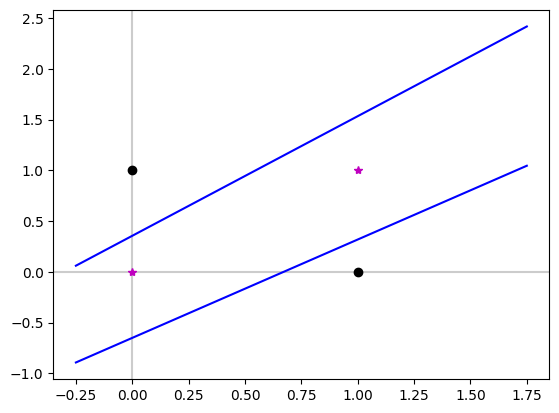

In [ ]:
# rysowanie osi x i y
plt.axhline(y=0, color="#cccccc")
plt.axvline(x=0, color="#cccccc")

xx=np.arange(-0.25,2)
yy = -(w[1][1][1]/w[1][1][2])*xx + (w[1][1][0]/w[1][1][2])
plt.plot(xx,yy, color='blue')

yy = -(w[1][2][1]/w[1][2][2])*xx + (w[1][2][0]/w[1][2][2])
plt.plot(xx,yy, color='blue')

for i in range(len(u)):
  if d[i] == 1:
    plt.plot(u[i][0], u[i][1],'ko')
  else:
    plt.plot(u[i][0], u[i][1],'m*')

plt.show()